import numpy as np
import pandas as pd
import os
from geopy.distance import great_circle
%matplotlib inline
import matplotlib.pyplot as plt
%pwd

In [20]:
# Import data 
os.chdir('/Users/karthik/Documents/Codebase/UMD_Data_Challenge/data/airline_tails/')
airchina = pd.read_csv('air_china.csv', delimiter = ',')
allnippon = pd.read_csv('all_nippon.csv', delimiter = ',')
american = pd.read_csv('american.csv', delimiter = ',')
britishairways = pd.read_csv('british_airways.csv', delimiter = ',')
chinaeast = pd.read_csv('china_eastern.csv', delimiter = ',')
chinasouth = pd.read_csv('china_southern.csv', delimiter=',')
delta = pd.read_csv('delta.csv', delimiter = ',')
emirates = pd.read_csv('emirates.csv', delimiter = ',')
etihad = pd.read_csv('etihad.csv', delimiter = ',')
lufthansa = pd.read_csv('lufthansa.csv', delimiter = ',')
qatar = pd.read_csv('qatar.csv', delimiter = ',')
ryan = pd.read_csv('ryanair.csv', delimiter = ',')
united = pd.read_csv('united.csv', delimiter = ',')
routes = pd.read_csv('./../../routes_cleaned.csv', delimiter=',')
airports = pd.read_csv('./../../codebeautify4.csv', delimiter=',')
fuel_econ_600 = pd.read_csv('./../../fuel_economy_1_500-660.csv', delimiter=',')
fuel_econ_1000 = pd.read_csv('./../../fuel_economy_2_1000.csv', delimiter=',')
fuel_econ_3000 = pd.read_csv('./../../fuel_economy_3_2160_3000.csv', delimiter=',')
fuel_econ_5000 = pd.read_csv('./../../fuel_economy_4_5000_7600.csv', delimiter=',')

In [21]:
print(list(fuel_econ_600))
print(list(fuel_econ_1000))
print(list(fuel_econ_3000))
print(list(fuel_econ_5000))

['model', 'firstflight', 'seats', 'sector', 'fuel_burn', 'fuel_efficiency']
['model', 'first_flight', 'seats', 'fuel_burn', 'fuel_efficiency']
['model', 'first_flight', 'seats', 'sector', 'fuel_burn', 'fuel_efficiency']
['model', 'first_flight', 'seats', 'sector', 'fuel_burn', 'fuel_efficiency']


In [22]:
# Define functions
def fleet_distance(airline_code):
    fleet_dist_arr = []
    for i, row in routes.iterrows():
        if row['Airline'] == airline_code :
            dist = get_dist(row['Source_IATA'], row['Dest_IATA'])
            fleet_dist_arr.append(np.floor(dist))
    fleet_dist_arr = np.unique(fleet_dist_arr)
    plt.hist(fleet_dist_arr,bins=7)
    return pd.DataFrame(fleet_dist_arr)

def get_dist(src, dst):
    try:
        dst_index = np.asscalar(np.where(airports['iata'] == dst)[0])
        src_index = np.asscalar(np.where(airports['iata'] == src)[0])
        src = (airports['lat'][src_index], airports['lon'][src_index])
        dst = (airports['lat'][dst_index], airports['lon'][dst_index])
        return great_circle(src, dst).miles
    except ValueError:
        return 500

CPU times: user 16.2 s, sys: 227 ms, total: 16.4 s
Wall time: 16.5 s


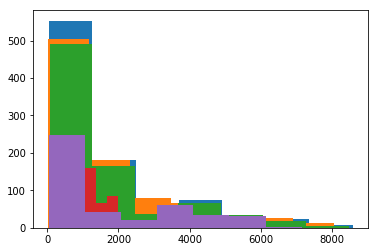

In [23]:
%%time
AA = fleet_distance('AA') # American
UA = fleet_distance('UA') # United 
DL = fleet_distance('DL') # Delta
FR = fleet_distance('FR') # Ryanair
LH = fleet_distance('LH') # Lufthansa

In [53]:
# Functions for efficiency
def calc_fleet_eff(airline_code):
    eff_count = 0
    for i, row in routes.iterrows():
        if row['Airline'] == airline_code :
            dist = get_dist(row['Source_IATA'], row['Dest_IATA'])
            aircraft = row['Aircraft']
            if aircraft == 'Other': 
                pass
            elif(most_eff(aircraft, dist) != True):
                eff_count+=1
    return int(eff_count/2)

def most_eff(aircraft, dist):
    if dist <= 350:
        if aircraft == 'ATR-72':
            return True
    elif dist <= 660:
        if aircraft == 'A321' or aircraft == '737':
            return True
    elif dist <= 1000:
        if aircraft == 'A319':
            return True
    elif dist <= 3000:
        if aircraft == '737' or aircraft == '787' or aircraft == '777':
            return True
    else :
        if aircraft == '787' or aircraft == 'A350' or aircraft == '777':
            return True
        

In [72]:
AA_eff = calc_fleet_eff('AA')
UA_eff = calc_fleet_eff('UA')
DL_eff = calc_fleet_eff('DL')
FR_eff = calc_fleet_eff('FR')
LH_eff = calc_fleet_eff('LH')

KeyboardInterrupt: 

In [74]:
a = ['AA', AA_eff],['UA', UA_eff],['DL', DL_eff],['FR', AA_eff],['LH', LH_eff]
a = np.array(a)
#np.savetxt('Fleet_effeciency_route.txt',a)
print(a)

[['AA' '421']
 ['UA' '308']
 ['DL' '377']
 ['FR' '421']
 ['LH' '298']]


In [ ]:
a